# Project III: Part 1 - Supermarket sales Data Exploration
## by J.Zakaria

## Introduction
> The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.


> the source of our [dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales) is kaggle.

## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set_theme()

In [4]:
# at the top of the file, before other imports
import warnings

warnings.filterwarnings('ignore')

# no warnings will be printed from now on.

> Let's load our dataset and describe its properties through the questions below. We'll try and motivate our exploration goals through this section.

In [5]:
# load in the dataset into a pandas dataframe, print statistics
sales = pd.read_csv('supermarket.csv')

In [6]:
sales.Branch = pd.Categorical(sales.Branch, categories=['A','B','C'], ordered=True)

In [5]:
# high-level overview of data shape and composition
print(sales.shape)
sales.dtypes

(1000, 17)


Invoice ID                   object
Branch                     category
City                         object
Customer type                object
Gender                       object
Product line                 object
Unit price                  float64
Quantity                      int64
Tax 5%                      float64
Total                       float64
Date                         object
Time                         object
Payment                      object
cogs                        float64
gross margin percentage     float64
gross income                float64
Rating                      float64
dtype: object

In [6]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
# Let's check for null values
sales.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
# Let's check for duplicated values
sales.duplicated().sum()

0

In [9]:
# Let's describe the data
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### What is the structure of your dataset?

> There are 1000 sales in the dataset with 17 features (Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating). Most variables are numeric in nature, but the variables Branch, City, Customer type, Gender and payement are categorical.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out which Branch scores the most sales and the feautures associated with it, also the sales by City looks interesting.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the main feauture that can impact sales for each Branch is the City, the price also has a hige impact on the sales, and finaly the rating, the other feautures also looks interessting so we'll figure all in our analysis.

## Univariate Exploration
   > First Let's look at the distrbution of the data, we'll see the distribution of the numerical data. Unit price and Total, COGS and Gross income, and Ratings.

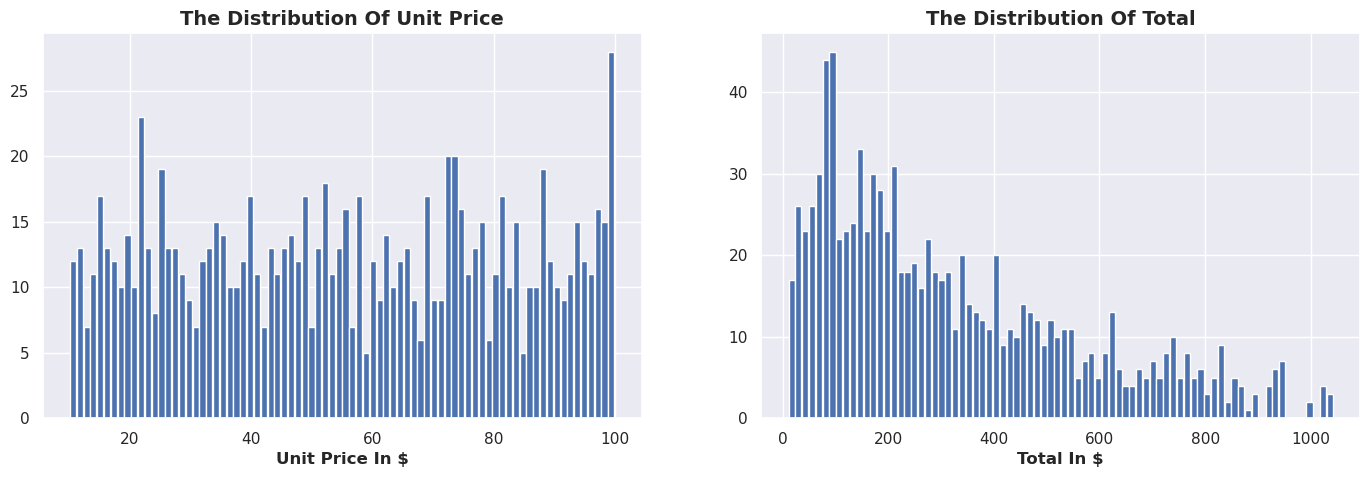

In [7]:
f, ax = plt.subplots(1,2,figsize=(17, 5))

def hist(xvar, data, bins=40, rwidth=0.9):
    plt.hist(data=data, x=xvar, bins =bins, rwidth = rwidth)
    plt.xlabel(f'{xvar} in $'.title(), fontsize=12, weight="bold")
    plt.title(f'The distribution of {xvar}'.title(), fontsize=14, weight="bold") 

plt.subplot(1,2,1)
hist('Unit price', sales, bins=80, rwidth=0.9)

plt.subplot(1,2,2)
hist('Total', sales, bins=80, rwidth=0.9)

The unit price distribution follows a uniform shape, and the Total price is right skewed. That means the most of the sold products in this data set are in low price.
Let's check the COGS and the Gross income.

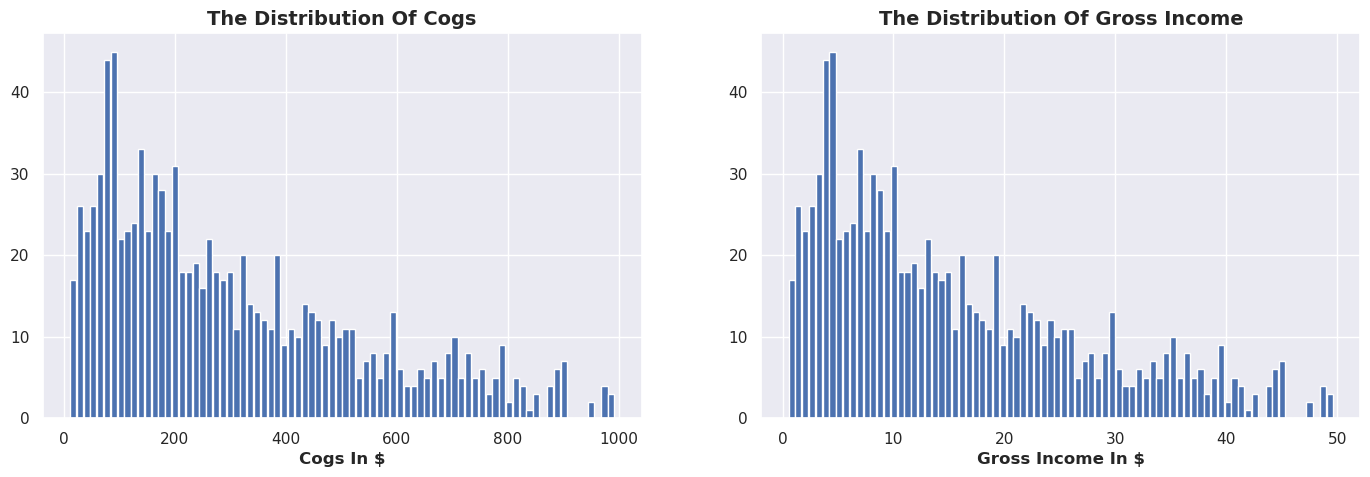

In [8]:
f, ax = plt.subplots(1,2,figsize=(17, 5))

plt.subplot(1,2,1)
hist('cogs', sales, bins=80, rwidth=0.9)

plt.subplot(1,2,2)
hist('gross income', sales, bins=80, rwidth=0.9)

Both the Cogs and the Gross income's distrubution is right skewed, because the costs and the profit are associated with each sold product. Let's see the rating.

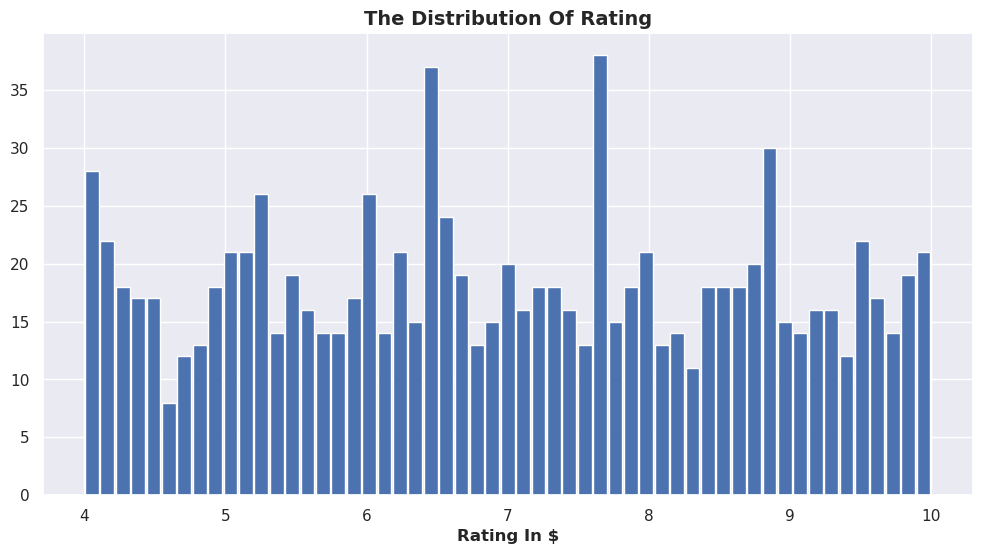

In [10]:
f, ax = plt.subplots(figsize=(12, 6))

hist('Rating', sales, bins=55, rwidth=0.9)

The rating follows a uniform shape.

Since we checked the raw distribution of the data, it's time to transform the data and check it's distribution, we'll apply a logarithmic scaling.

In [11]:
def loghist(xvar, data, bins=40, rwidth=0.9):
    plt.hist(data=data, x=xvar, bins =bins, rwidth = rwidth)
    plt.xlabel(f'{xvar} in $'.title(), fontsize=12, weight="bold")
    plt.title(f'The log distribution of {xvar}'.title(), fontsize=14, weight="bold") 

([<matplotlib.axis.XTick at 0x7f9aed79a320>,
 [Text(1.0, 0, '10'), Text(10.0, 0, '40')])

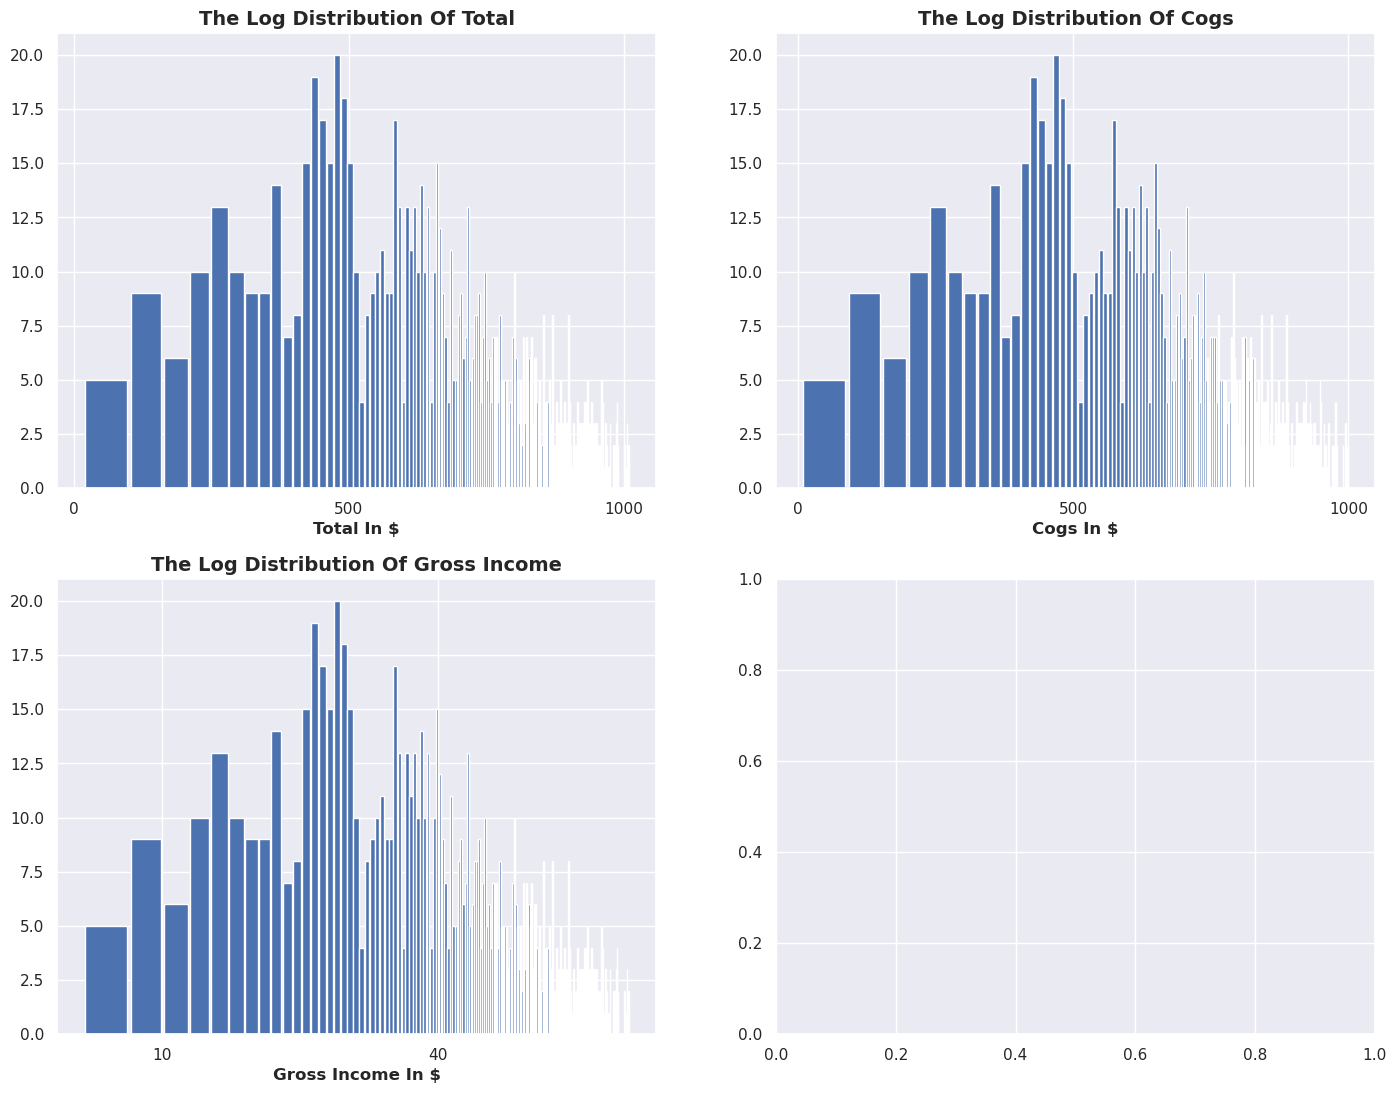

In [12]:
f, ax = plt.subplots(2,2,figsize=(17, 13))

plt.subplot(2,2,1)
loghist('Total', sales, bins=200, rwidth=0.9) 
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['0','500', '1000'])

plt.subplot(2,2,2)
loghist('cogs', sales, bins=200, rwidth=0.9)
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['0','500', '1000'])

plt.subplot(2,2,3)
loghist('gross income', sales, bins=200, rwidth=0.9)
plt.xscale('log')
plt.xticks([1e0, 1e1], ['10','40'])

 In a logarithmic scale all of the Cogs, the Gross income, and the Total look in a uinomdal shape, the mean or the median values are the most frequent values in the data above. Now let's check the categorical values of the data set.

<AxesSubplot:xlabel='Gender', ylabel='count'>

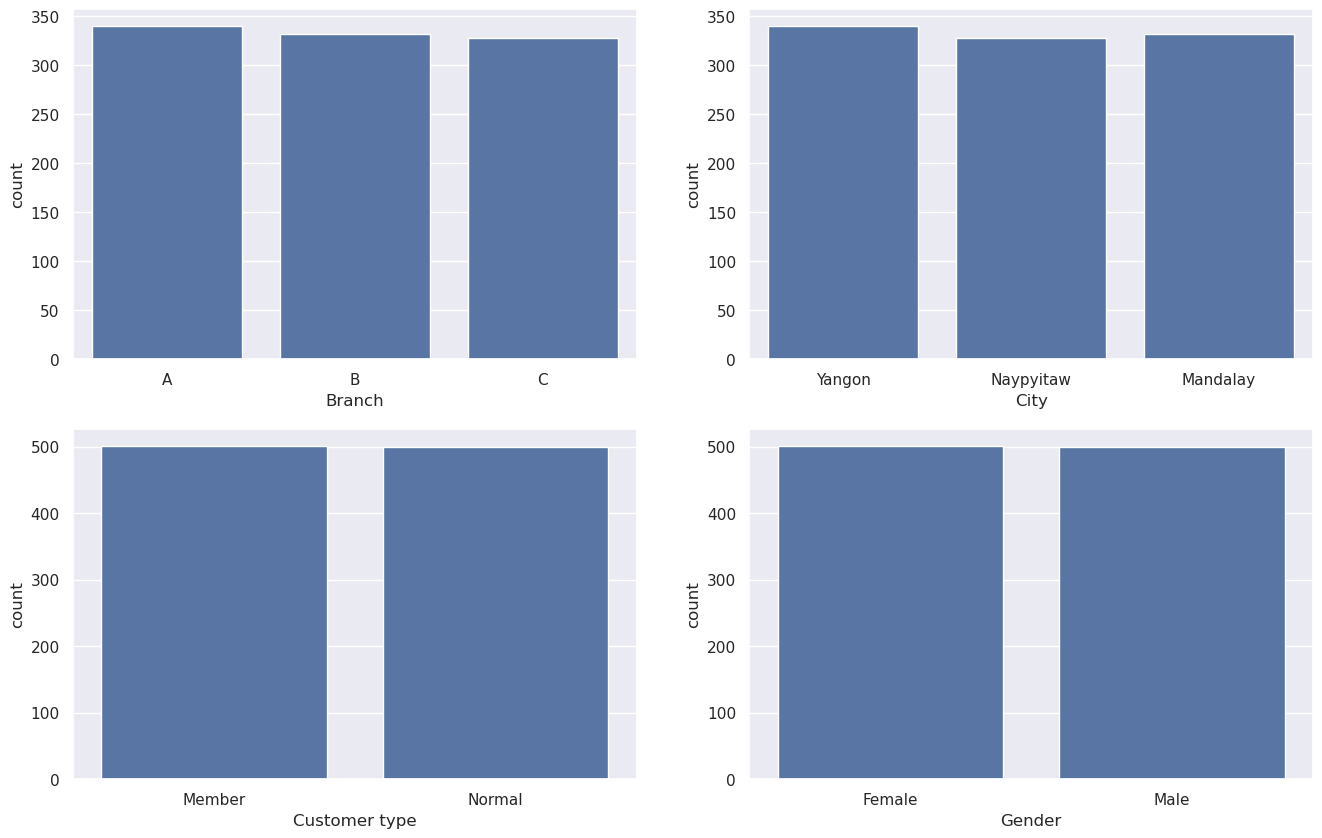

In [13]:
f, ax = plt.subplots(2,2,figsize=(16, 10))
default_color = sb.color_palette()[0]

plt.subplot(2,2,1)
sb.countplot(data = sales, x = 'Branch', color = default_color)

plt.subplot(2,2,2)
sb.countplot(data = sales, x = 'City', color = default_color)

plt.subplot(2,2,3)
sb.countplot(data = sales, x = 'Customer type', color = default_color)

plt.subplot(2,2,4)
sb.countplot(data = sales, x = 'Gender', color = default_color)

It seems there is no difference between each of our categorical variable in this data set, Gender are equal, Branches are equal, City and also Customer type.

<AxesSubplot:xlabel='Payment', ylabel='count'>

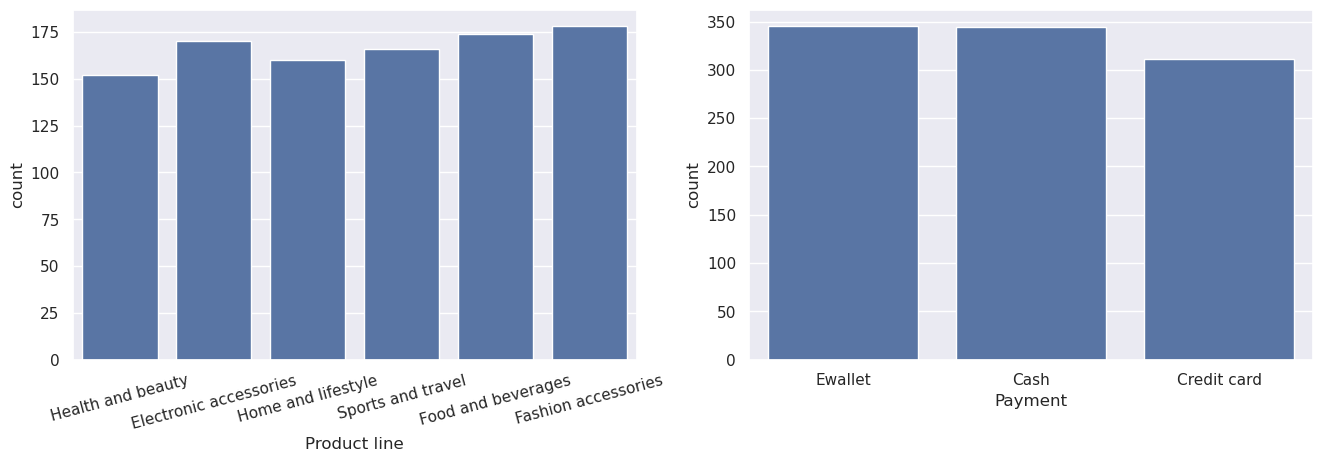

In [14]:
# Let's check for the rest
f, ax = plt.subplots(1,2,figsize=(16, 10))
default_color = sb.color_palette()[0]

plt.subplot(2,2,1)
sb.countplot(data = sales, x = 'Product line', color = default_color)
plt.xticks(rotation=15)

plt.subplot(2,2,2)
sb.countplot(data = sales, x = 'Payment', color = default_color)

There is a small difference between product types in the dataset, fashio, food  and electronic products are more than the other produc types by just a few amount, also there is no huge differedce between payements methods, the Ewallet and Cash are higher a few than Credit cart payement. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The total price, Cogs, and the Gross income variables took a right skew distribution, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with the one peak in the middle  500 dollar for the two fist variables, and 25 dollar for Gross income.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Not, the data variables of the data set are normal and i don't observe some irregular values.

## Bivariate Exploration

> In this section, we'll investigate relationships between pairs of variables in the
data.

In [15]:
numeric_vars = ['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating']
categoric_vars = ['Branch','City','Customer type','Gender','Product line']

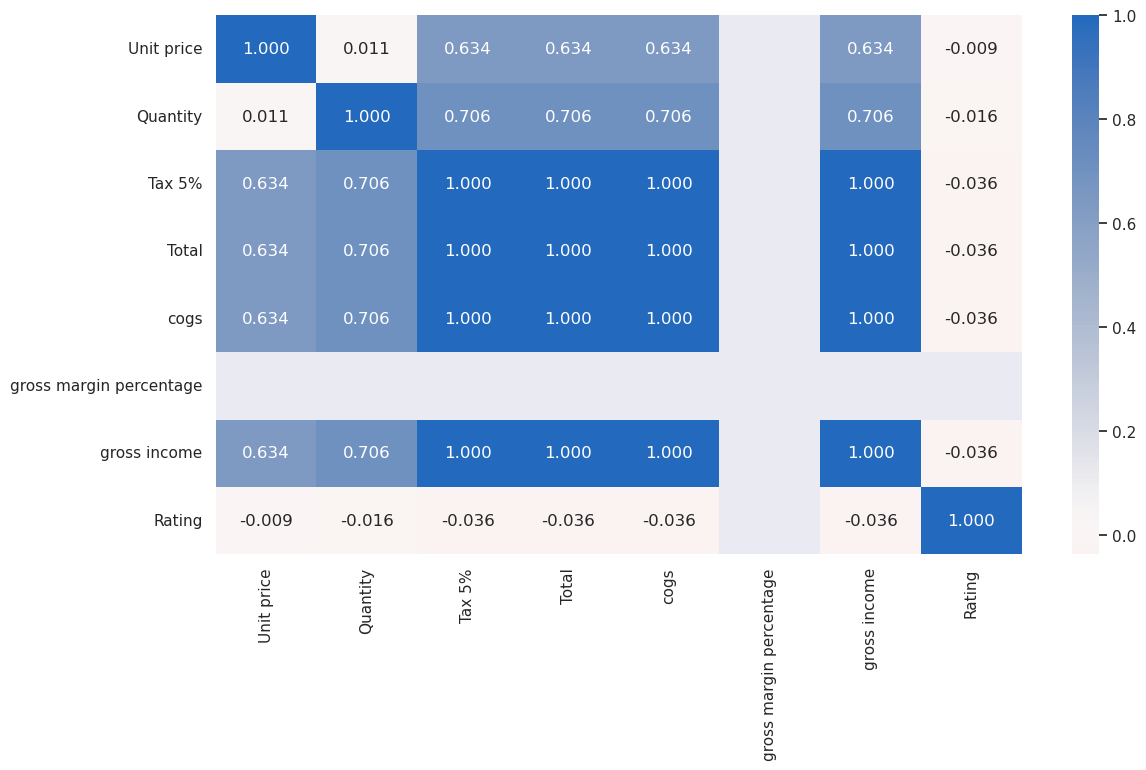

In [16]:
# correlation plot
plt.figure(figsize = [13, 7])

sb.heatmap(sales[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

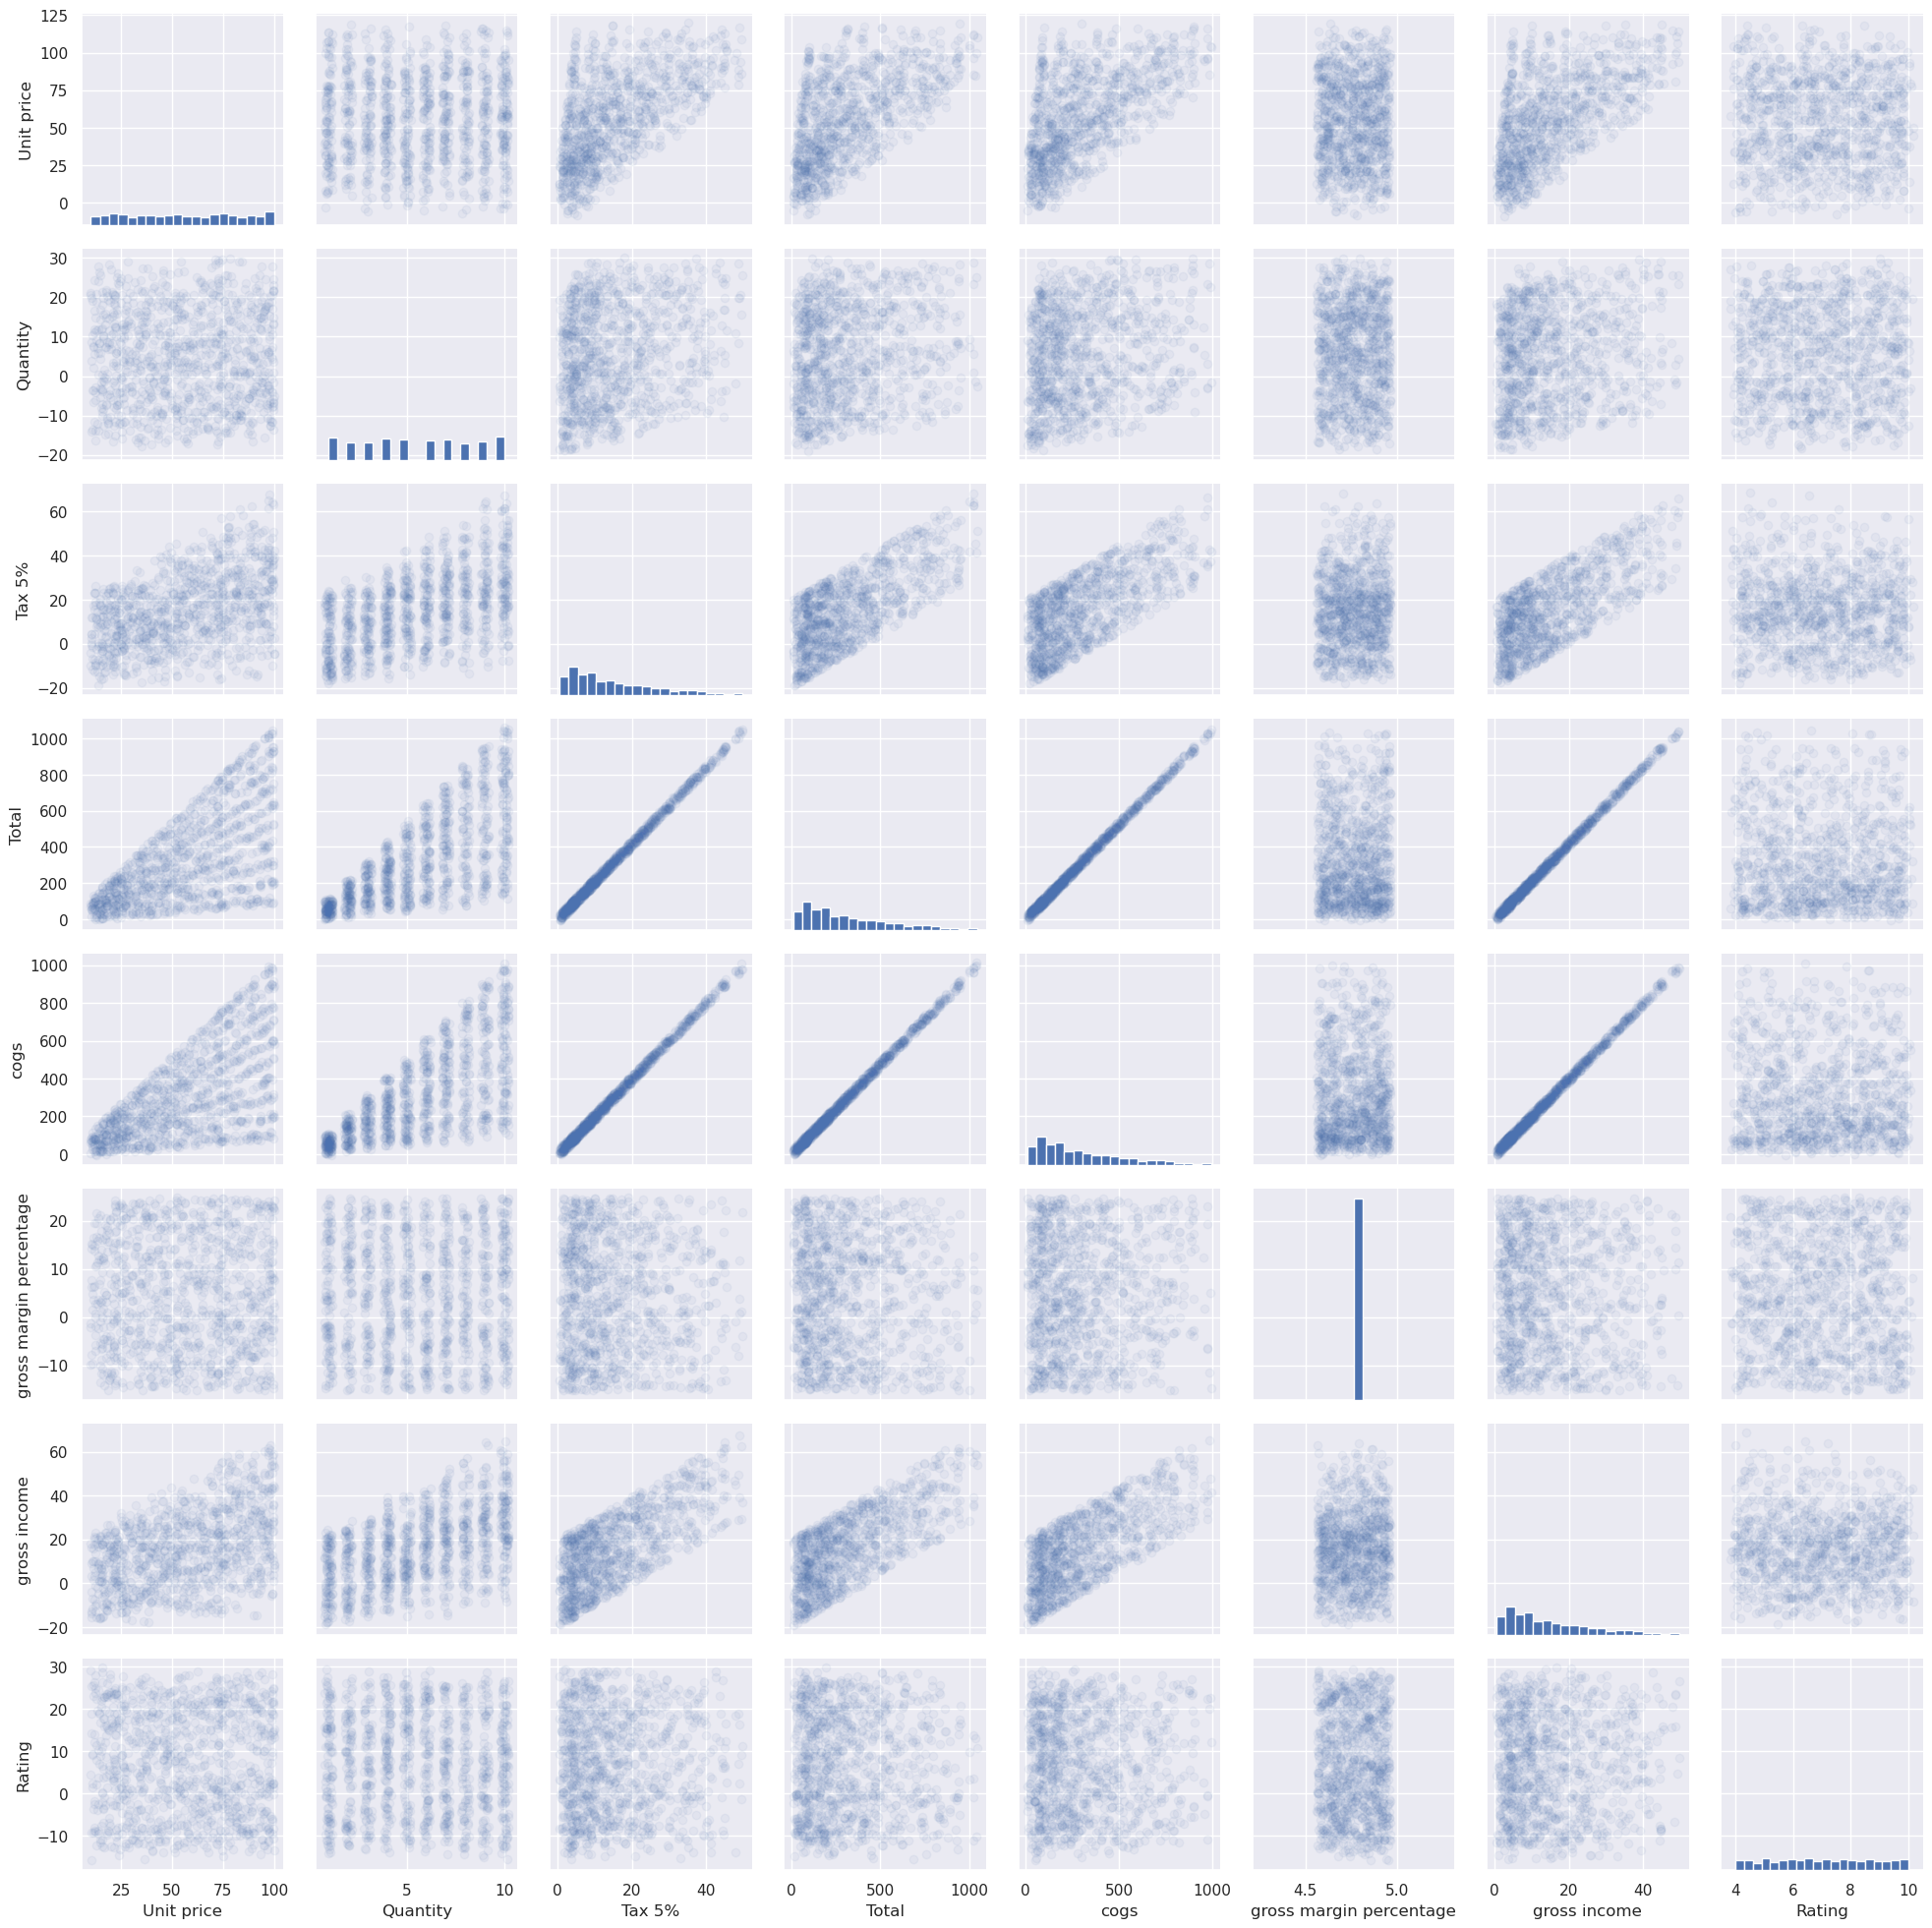

In [17]:
# scatter plots
g = sb.PairGrid(data = sales, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(sb.regplot, fit_reg = False,
           x_jitter = 0.2, y_jitter = 20, scatter_kws = {'alpha' : 1/18})

There are different correlatiopns and patterns in the data, First we see that Rating has a weak correlation with the other variables, so it's doesn't impact the prices or the costs or the income, it doesn't impact the sales, the gross income, cogs, total and tax have a powerful correlation whic is 1, and hey depend on quantity sold and price. [Overplotting](https://julienbeaulieu.gitbook.io/wiki/sciences/programming/data-analysis/data-visualization/bivariate-exploration-of-data/overplotting-transparency-and-jitter). [and This](https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python).

Let's now check the Unit price and the Quantity sold for each Branch.

<Figure size 1600x500 with 0 Axes>

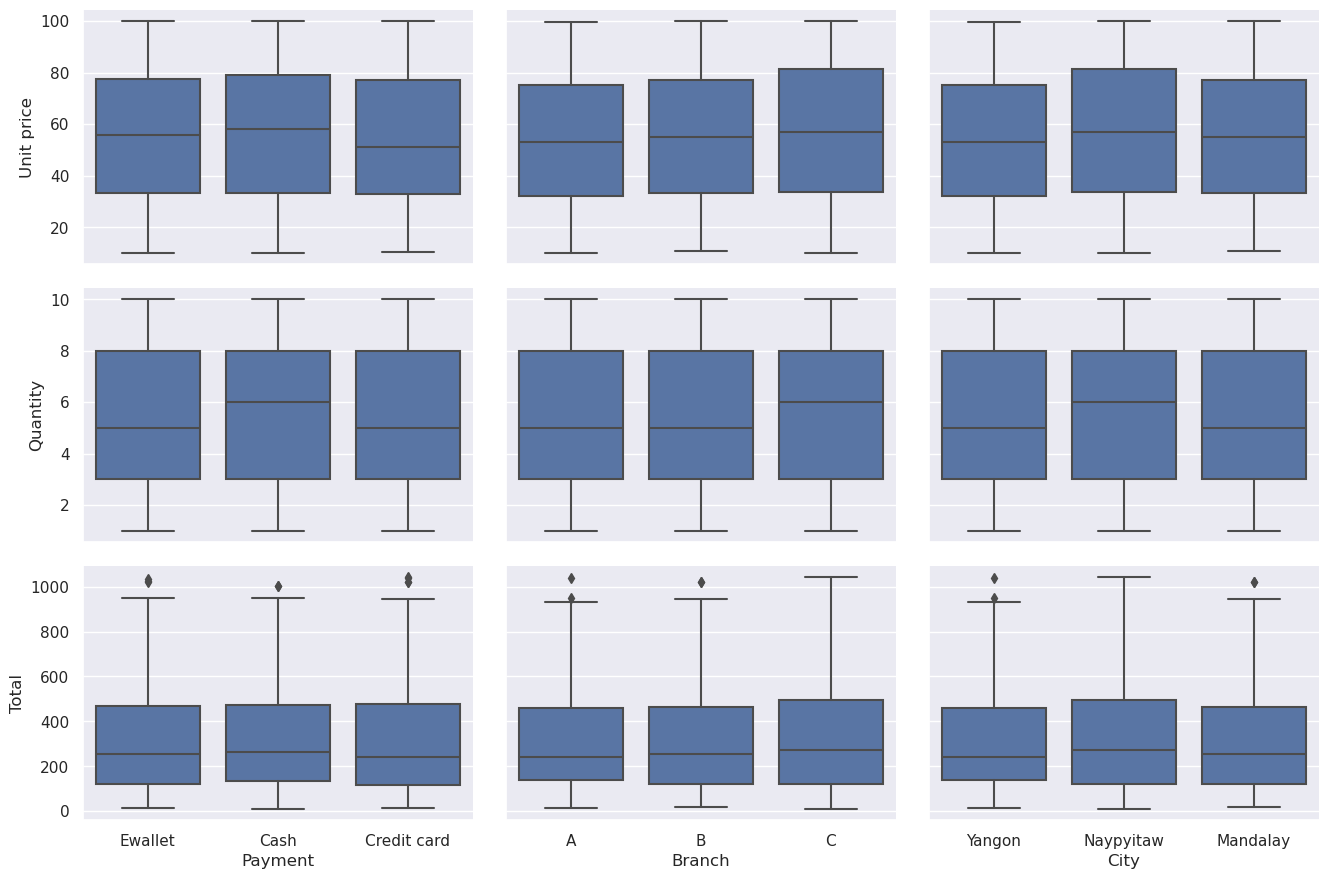

In [18]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
 
plt.figure(figsize = [16, 5])
g = sb.PairGrid(data = sales, y_vars = ['Unit price','Quantity','Total'], x_vars = ['Payment','Branch','City'], height = 3, aspect = 1.5)
g.map(boxgrid)

In [19]:
sales.groupby('City')['Branch'].value_counts()

City        
Mandalay   B    332
           A      0
           C      0
Naypyitaw  C    328
           A      0
           B      0
Yangon     A    340
           B      0
           C      0
Name: Branch, dtype: int64

For the payement method the Cash payement is more used when the quantity is high, but there is no hige difference between the Cash payement and the other methods. It seems the Branch C has more Quantity in sales, but in unit price and total they re the same. Naypy City has more Quantity in sales and more unit price, it's the city of the Branch C.

<Figure size 1600x500 with 0 Axes>

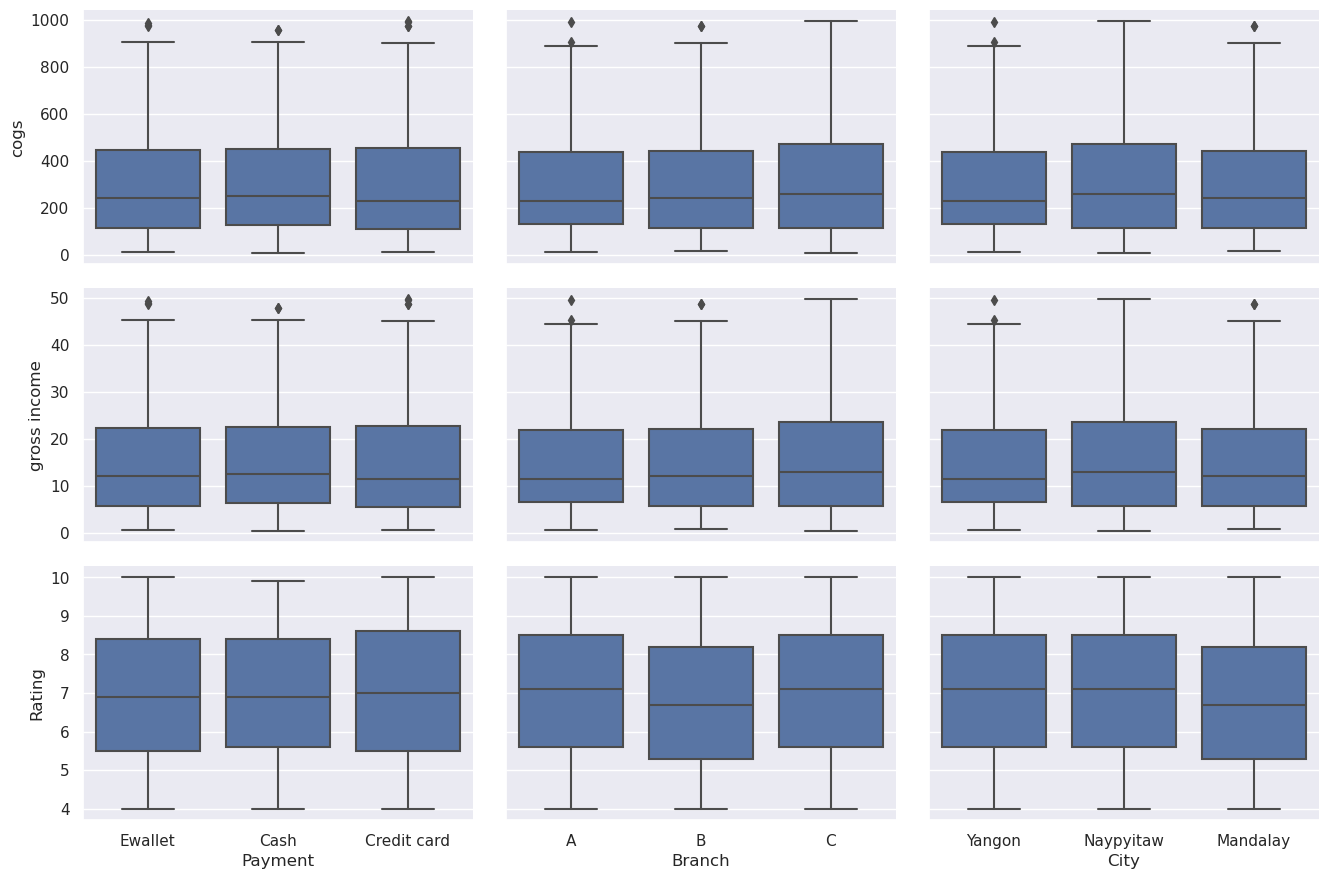

In [20]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [16, 5])
g = sb.PairGrid(data = sales, y_vars = ['cogs','gross income','Rating'], x_vars = ['Payment','Branch','City'], height = 3, aspect = 1.5)
g.map(boxgrid)

The Branch B is a bit low in rate than the other Branches, the cogs of product looks slow a bit in Yagon City, and all the payement methods contribute in the gross income for each Branch.

In [23]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [24]:
sales.groupby('Branch')['Customer type'].value_counts()

Branch  Customer type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: Customer type, dtype: int64

The number of members and normal customers are close in each Branch.

In [25]:
sales.groupby('Branch')['Gender'].value_counts()

Branch  Gender
A       Male      179
        Female    161
B       Male      170
        Female    162
C       Female    178
        Male      150
Name: Gender, dtype: int64

It seems the Branch C is the only with females more than males.

In [26]:
sales.groupby('Branch')['Product line'].value_counts()

Branch  Product line          
A       Home and lifestyle        65
        Electronic accessories    60
        Sports and travel         59
        Food and beverages        58
        Fashion accessories       51
        Health and beauty         47
B       Fashion accessories       62
        Sports and travel         62
        Electronic accessories    55
        Health and beauty         53
        Food and beverages        50
        Home and lifestyle        50
C       Food and beverages        66
        Fashion accessories       65
        Electronic accessories    55
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
Name: Product line, dtype: int64

Each Branch realise sales in their specific product line, there is no specific product type that can realise profit for all the Branches but each Brach can make profit from different products.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a positive correlation between the groos income, cogs and the tax and the total price, alongside withe quantity 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I don't observe any interessting feautures between thecategorical variables in the dataset, the most of them are close between each other, the C Branch a few higher than the others in gross profit and the Quantity and unit price.

## Multivariate Exploration

> Let's check for the multi relationships between the categorcal and the numerical features of the data set. starting with the gross income vs the Quantity for each Branch.

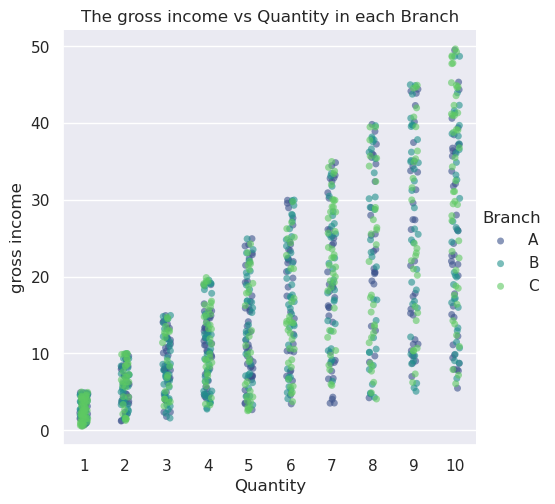

In [22]:
g = sb.FacetGrid(data = sales, hue = 'Branch', height = 5, palette = 'viridis')

g.map(sb.stripplot, 'Quantity', 'gross income', alpha=0.6, jitter=True)
plt.title('The gross income vs Quantity in each Branch')
g.add_legend()

we observe that there is a positive correlation between the quantity and the gross incme for each Branch. let's check the product line profit for each branch.

Text(0.5, 1.0, 'The gross income by product type for each Branch')

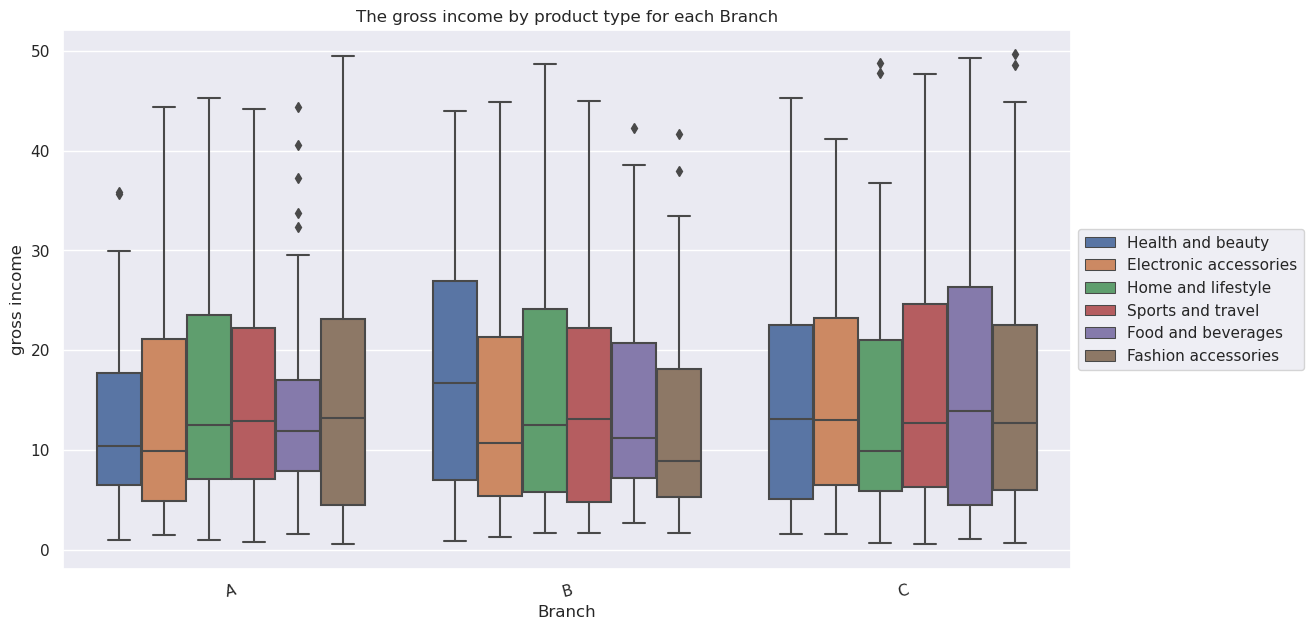

In [23]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
plt.figure(figsize = [13, 7])


sb.boxplot(data = sales, x = 'Branch', y = 'gross income', hue = 'Product line')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.title('The gross income by product type for each Branch')

The Health and Beaty, Home and life style realize the best sales for the Branch B, Food and beverages, sports and travel for the branch C, and Home and life style, fashion and accessories, sports and lifestyle for the branch A, however the sales of food and beverages are too small in the Branch A. Let's see the profit by customeet type.

Text(0.5, 1.0, 'gross income in each branch by customer type')

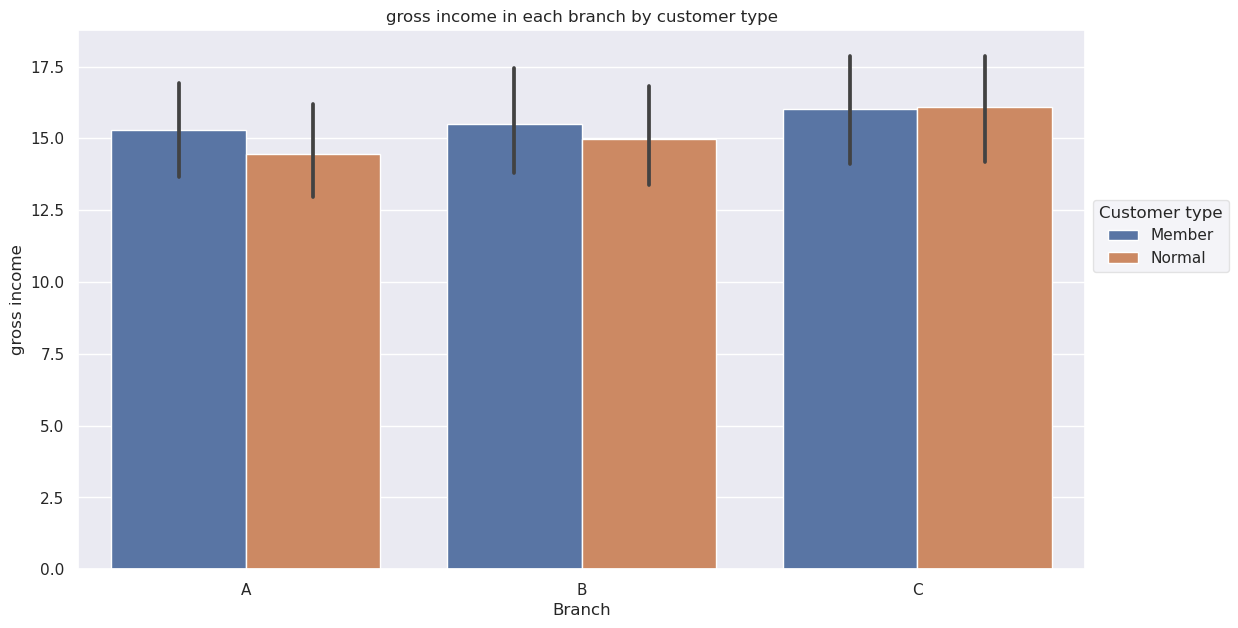

In [24]:
# plot the data using the calculated weights
plt.figure(figsize = [13, 7])

ax = sb.barplot(data = sales, x = 'Branch', y = 'gross income', hue = 'Customer type')
ax.legend(loc = 1, bbox_to_anchor = (1.15, 0.7), framealpha = 0.5, title = 'Customer type')
plt.title('gross income in each branch by customer type')

Member or Normal customer, both of them can realise huge profit for the branches, there is no huge difference but just a little bit, members can realise high profit in the Branch A and B. Let's see by gender.

Text(0.5, 1.0, 'gross income in each branch by Gender')

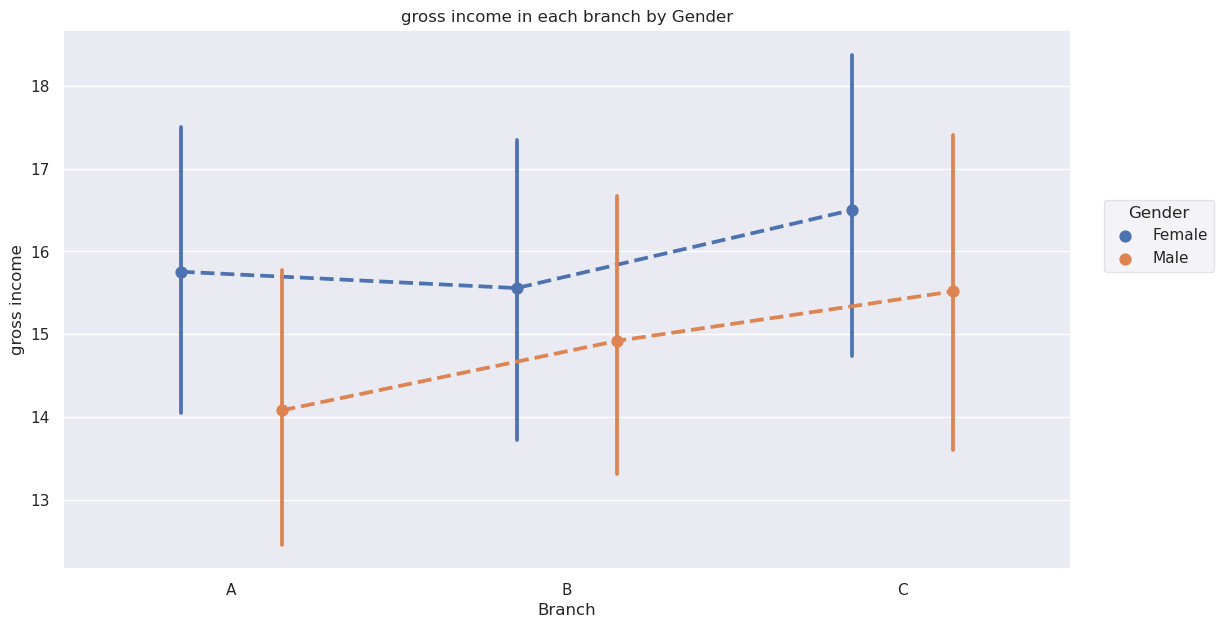

In [25]:
plt.figure(figsize = [13, 7])

ax = sb.pointplot(data = sales, x = 'Branch', y = 'gross income', hue = 'Gender', dodge = 0.3, linestyles = "--")
ax.legend(loc = 1, bbox_to_anchor = (1.15, 0.7), framealpha = 0.5, title = 'Gender')
plt.title('gross income in each branch by Gender')

In general Female gender seems profitable for all the branches, but there is not huge difference between the genders. Let's see the payement methods.

Text(0.5, 1.0, 'gross income in each branch by Payment')

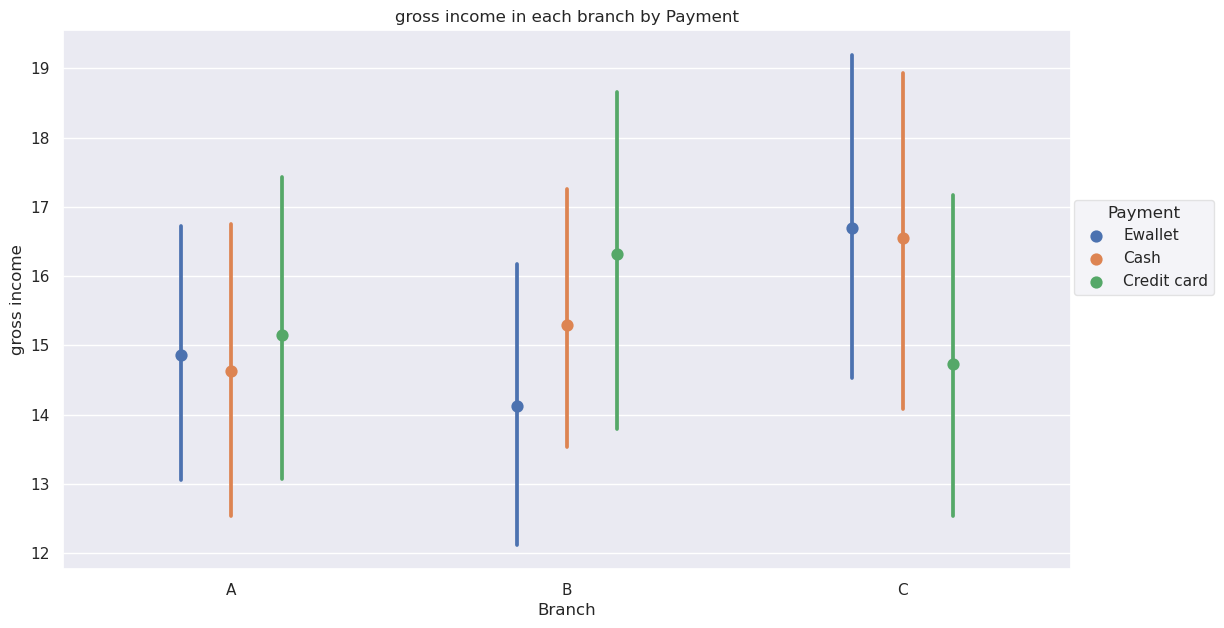

In [26]:
plt.figure(figsize = [13, 7])

ax = sb.pointplot(data = sales, x = 'Branch', y = 'gross income', hue = 'Payment', dodge = 0.3, linestyles = "")
ax.legend(loc = 1, bbox_to_anchor = (1.15, 0.7), framealpha = 0.5, title = 'Payment')
plt.title('gross income in each branch by Payment')

For the Branch A, the payement methods are colse and the credit card and Ewallet are popular, however in the Branch C the credit card is not popular than Ewallet and cash, but in the Branch B the Credit card is popular and the Ewallet in not. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The §Quantity has a huge impact on the gross income in all the Branches, however we are interested more in the relation between the categorical variables and the gross income for each branch, there are some common feature in every Branch like the gender and customer type, the gross income, the quantity, which they don't varry alot for each branch.

### Were there any interesting or surprising interactions between features?

> The most interessting feature is the product line, which it varries for each Branch, each branch has a specific product that can realise the most profit for it.

## Conclusions
The source of this data set is kaggle, i took it because it was clean and good for data visualization, the like in the 1st section. I load the data and i assigned it to a dataframe, i assessed it visually and programmaticaly, then i started the project.

**In the univariate exploration** i looked to the distribution of the numerical variables the unit price adn rating were both in a uniform shapes, the total and cogs and gross income were in a right skew form, so i used the log scale on them, thir shape were unimodal with one peak in the middle. Then i looked for the categorical variables of the data, Branch, City, Customer type, Gender, Product line, and payement methods, their types were just similar, females = males, member = normal, and so on...

**In the Bivariate exploration** i used the heatmap and the scatter plots for the numerical variables, there was different correlatiopns and patterns in the data, rating has a weak correlation with the other variables, so it doesn't impact the prices or the costs or the income, it doesn't impact the sales, the gross income, cogs, total and tax have a powerful correlation whic is 1, and they depend on quantity sold and price.Then i looked for the relationship between the numerical and the categorical variables, there was no differences they values were so close, only the Branch C has more profi a little bit.

**In the Multivariate Exploration** i made a visualization for the relationship between the quantity and the gross profit for each branch, the quantity as a positive impact on the gross profit for each Branch, since we are interessted more on the categorical variables i made a categorical visualization, In general Female gender seems profitable for all the branches, but there is not huge difference between the genders,  the payement methods in the branch A are similar and the credit card and Ewallet are popular, however in the Branch C the credit card is not popular than Ewallet and cash, but in the Branch B the Credit card is popular and the Ewallet in not. For the customer type Member or Normal customer, both of them can realise huge profit for the branches, there is no huge difference but just a little bit, members can realise high profit in the Branch A and B.

And finally the main conclusion, The Health and Beaty, Home and life style realize the best sales for the Branch B, Food and beverages, sports and travel for the branch C, and Home and life style, fashion and accessories, sports and lifestyle for the branch A, however the sales of food and beverages are too small in the Branch A.
